In [1]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
import csv

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open('data/process/V4b(2)_0128_HK10TMn_24hr(P).CSV', 'r') as csvfile:
# 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)


In [4]:
data[3][1][2:7]

'14:16'

In [2]:
def FindErrTM(OpenfileName, n):
    with open(OpenfileName, 'r') as csvfile:
    # 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)
    t=0
    Timess =0
    length = int((len(data)))
    hapen=0
    for i in range(1,len(data)):
        R1 =   float(data[i][11])
        R2 =   float(data[i][12])
        if ((t > n) & (2.0>R2>1.0) & (2.0>R1>1.0)):
            print(f'{hapen} ~ {data[i][1][2:7]}')
            print('----------')
            Timess+=1
        if((2.0>R2>1.0) & (2.0>R1>1.0)):
            t=0
        else: t+=1
        if(t == n):
            hapen = data[i-t][1][2:7]
            # print(data[i-t][1][2:7])
    return Timess

In [3]:

def draw_CMDCnt_RebCnt_R1R2(OpenfileName, resolution, Date):
    with open(OpenfileName, 'r') as csvfile:
    # 讀取 CSV 檔案內容
        rows = csv.reader(csvfile)
        data = list(rows)
    
    length = int((len(data)))
    tmp = np.zeros((length))
    CMD_acc_c = np.zeros((length))
    hk_num_c = np.zeros((length))
    reb_c = np.zeros((length))
    _sci_write_num_ = np.zeros((length))
    R1 = np.zeros((length))
    R2 = np.zeros((length))
    WDT_Cnt = np.zeros((length))
    for i in range(1,len(data)):
        tmp[i] =   (data[i][0])
        CMD_acc_c[i] =   data[i][2]
        reb_c[i] =   data[i][6]
        _sci_write_num_[i] =   data[i][9]
        R1[i] =    data[i][11]
        R2[i] =    data[i][12]
        WDT_Cnt[i] =    data[i][17]
    
    # plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.scatter(tmp*resolution,CMD_acc_c, s=0.25, color='b', label=f'R1')
    plt.axis([-1, length*resolution, -50,300])
    plt.xlabel(" Time (hrs)")
    plt.title(f'Command Counter ({Date})')
    plt.subplot(2,2,2)
    plt.scatter(tmp*resolution,reb_c, s=0.25, color='b', label=f'R1')
    # plt.axis([-1, length*resolution, -1,70])
    plt.xlabel(" Time (hrs)")
    plt.title(f'Reboot Counter ({Date})') 
    plt.subplot(2,2,3)
    plt.scatter(tmp*resolution,R1, s=0.25, color='g', label=f'R1')
    # plt.scatter(tmp*resolution,R2, s=0.25, color='r', label=f'R2')
    plt.legend() 
    plt.xlabel(" Time (hrs)")
    plt.ylabel("Voltage (V)")
    plt.title(f'RADFET Voltage ({Date})')
    plt.subplot(2,2,4)
    plt.scatter(tmp*resolution,WDT_Cnt, s=0.25, color='b')
    plt.axis([-1, length*resolution, -50,300])
    plt.xlabel(" Time (hrs)")
    plt.title(f'WDT Error(health[3]) Counter ({Date})')


In [4]:
# print('***** HK30TM1 - 0206_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0206_HK30TM1(P).CSV', 6)
# print(f'Over 3 mins data error times: {a}')
# print(' ')

# print('***** HK30TM1 - 0207_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0207_HK30TM1(P).CSV', 6)
# print(f'Over 3 mins data error times: {a}')
# print(' ')

print('***** HK30TM30 - 0313_4days *****')
# a = FindErrTM('data/process/V4b(2)_0307_HK30TM30(P).CSV', 6)
# a = FindErrTM('data/process/V4b(2)_0313_HK30TM10(P).CSV', 6)
a = FindErrTM('data/process/V4b(2)_0401_HK30TM1_SW374_FWgpio(P).CSV', 6)

print(f'Over 3 mins data error times: {a}')
print(' ')
# print('***** HK30TM1 - 0219_5days *****')
# # a = FindErrTM('data/process/V4b(2)_0219_5days(P).CSV', 6)
# print(f'Over 3 mins data error times: {a}')
# print(' ')

***** HK30TM30 - 0313_4days *****
01:43 ~ 02:07
----------
08:32 ~ 08:55
----------
10:31 ~ 10:55
----------
16:03 ~ 16:27
----------
21:29 ~ 21:52
----------
22:17 ~ 22:40
----------
00:19 ~ 00:23
----------
04:28 ~ 04:52
----------
09:43 ~ 10:06
----------
13:06 ~ 13:10
----------
13:34 ~ 13:57
----------
15:15 ~ 15:38
----------
16:11 ~ 16:34
----------
18:04 ~ 18:28
----------
Over 3 mins data error times: 14
 


## TVTC data

In [5]:
# plt.figure(figsize=(12,10))
# Aresolution = 1/3600
# draw_CMDCnt_RebCnt_R1R2('data/TVTC/process/HOT1_HK_1109.CSV(P).CSV', Aresolution, 'TVTC_1109')

## Long Time Test

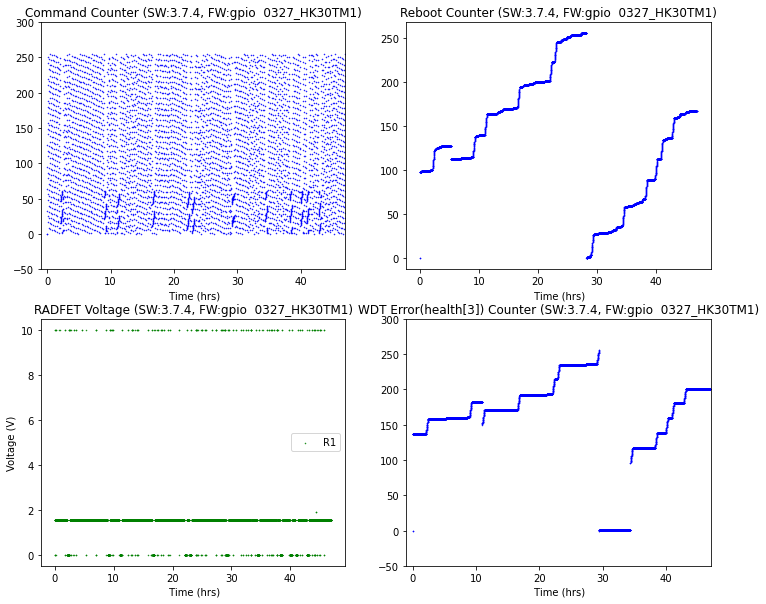

In [6]:


plt.figure(figsize=(12,10))
Aresolution = 2/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0202_HK2TM2(P).CSV', Aresolution, '0202_HK2TM2')

Aresolution = 10/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0123_HK10TM1(P).CSV', Aresolution, '0123_HK10TM1')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0124_HK10TM1(P).CSV', Aresolution, '0124_HK10TM1')

Aresolution = 30/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0125_HK30TM1(P).CSV', Aresolution, '0125_HK30TM1')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0203_HK30TMn_24hr(P).CSV', Aresolution, '0203_HK30')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0216_HK30TM1(P).CSV', Aresolution, '0216_HK30_3days')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0207_HK30TM1(P).CSV', Aresolution, '0207_HK30')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0206_HK30TM1(P).CSV', Aresolution, '0206_HK30')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0219_5days(P).CSV', Aresolution, '0219_5days')
# draw_CMDCnt_RebCnt_R1R2('data/process/V3_ERROR_0226(P).CSV', Aresolution, 'V3')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0307_HK30TM30(P).CSV', Aresolution, '0307_HK30TM30')
draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0401_HK30TM1_SW374_FWgpio(P).CSV', Aresolution, 'SW:3.7.4, FW:gpio  0327_HK30TM1')




Aresolution = 60/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0127_HK60TM1(P).CSV', Aresolution, '0127_HK60TM1')
# Aresolution = 10/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0128_HK10TMn_24hr(P).CSV', Aresolution, '0128_HK10')

Aresolution = 15/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(1)_1222_HK15TM15_3days(P).CSV', Aresolution, 'V4b(1)1222_HK15TM15')
Aresolution = 60/3600
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0129_HK30TMn_24hr(P).CSV', Aresolution, '0129_HK30')
# draw_CMDCnt_RebCnt_R1R2('data/process/V4b(2)_0201_HK60TMn_24hr(P).CSV', Aresolution, '0201_HK60')



In [7]:
# print('***** HK10TM1 - 0124_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0124_HK10TM1(P).CSV', 18)
# print(f'Over 3 mins data error times: {a}')
# print(' ')

# print('***** HK30TM1 - 0125_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0125_HK30TM1(P).CSV', 6)
# print(f'Over 3 mins data error times: {a}')
# print(' ')
# print('***** HK60TM1 - 0127_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0127_HK60TM1(P).CSV', 3)
# print(f'Over 3 mins data error times: {a}')
# print(' ')
# print('***** HK10 NoTIME - 0128_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0128_HK10TMn_24hr(P).CSV', 18)
# print(f'Over 3 mins data error times: {a}')

In [8]:
# print('***** HK30 NoTIME - 0128_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0129_HK30TMn_24hr(P).CSV', 6)

# print('***** HK60 NoTIME - 0128_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0201_HK60TMn_24hr(P).CSV', 3)

# print('***** HK30 NoTIME - 0203_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0203_HK30TMn_24hr(P).CSV', 6)
# print('***** HK2 TIME2 - 0202_24hrs *****')
# a = FindErrTM('data/process/V4b(2)_0202_HK2TM2(P).CSV', 90)

